# Exploratory Data Analysis for FUNSD Dataset

In [1]:
# Import relevant libraries for EDA
import os
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import PIL
from PIL import Image, ImageFont, ImageDraw
from basic_image_eda import BasicImageEDA

In [3]:
# Define data directory path
train_data_dir = '../data/funsd/training_data/images'
test_data_dir = '../data/funsd/testing_data/images'

#### Plot and Get Summary Statistics for FUNSD dataset

In [4]:
# Define BasicImageEDA parameters
extensions = ['png', 'jpg', 'jpeg']
threads = 8
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0


found 149 images.
Using 8 threads. (max:8)



100%|██████████| 149/149 [00:01<00:00, 98.82it/s] 



*--------------------------------------------------------------------------------------*
number of images                         |  149

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['png']

min height                               |  1000
max height                               |  1000
mean height                              |  1000.0
median height                            |  1000

min width                                |  754
max width                                |  863
mean width                               |  768.0134228187919
median width                             |  762

mean height/width ratio                  |  1.3020605764021183
median height/width ratio                |  1.3123359580052494
recommended input size(by mean)          |  [1000  768] (h x w, multiples of 8)
recommended input size(by mean)          |  [992 768] (h x w, multiples of 16)
recommended input s

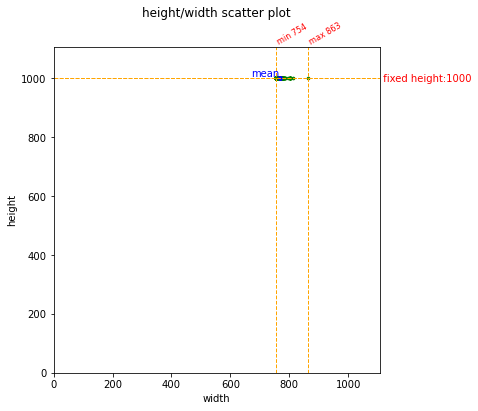

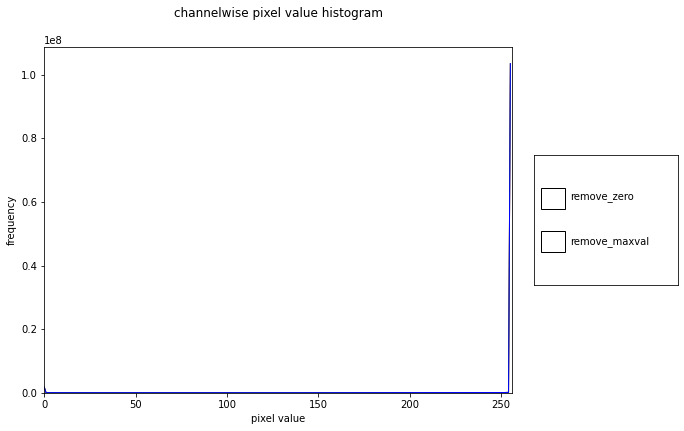

{'dtype': 'uint8',
 'channels': [1],
 'extensions': ['png'],
 'min_h': 1000,
 'max_h': 1000,
 'mean_h': 1000.0,
 'median_h': 1000,
 'min_w': 754,
 'max_w': 863,
 'mean_w': 768.0134228187919,
 'median_w': 762,
 'mean_hw_ratio': 1.3020605764021183,
 'median_hw_ratio': 1.3123359580052494,
 'rec_hw_size_8': array([1000,  768]),
 'rec_hw_size_16': array([992, 768]),
 'rec_hw_size_32': array([992, 768]),
 'mean': 0.9480288716770658,
 'std': 0.19409227683911254}

In [5]:
# Plot Summary Statistics for Training Data
BasicImageEDA.explore(train_data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)


found 50 images.
Using 8 threads. (max:8)



100%|██████████| 50/50 [00:01<00:00, 42.10it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  50

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['png']

min height                               |  1000
max height                               |  1000
mean height                              |  1000.0
median height                            |  1000

min width                                |  754
max width                                |  802
mean width                               |  764.2
median width                             |  754

mean height/width ratio                  |  1.3085579691180318
median height/width ratio                |  1.3262599469496021
recommended input size(by mean)          |  [1000  768] (h x w, multiples of 8)
recommended input size(by mean)          |  [992 768] (h x w, multiples of 16)
recommended input size(by mean) 

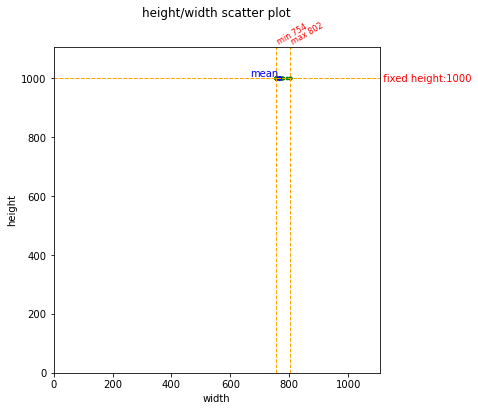

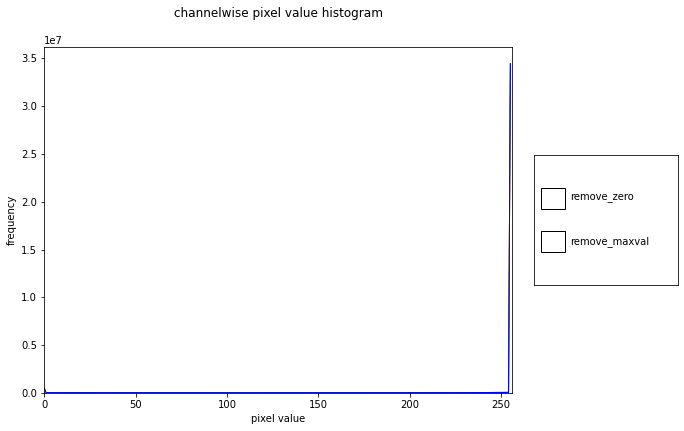

{'dtype': 'uint8',
 'channels': [1],
 'extensions': ['png'],
 'min_h': 1000,
 'max_h': 1000,
 'mean_h': 1000.0,
 'median_h': 1000,
 'min_w': 754,
 'max_w': 802,
 'mean_w': 764.2,
 'median_w': 754,
 'mean_hw_ratio': 1.3085579691180318,
 'median_hw_ratio': 1.3262599469496021,
 'rec_hw_size_8': array([1000,  768]),
 'rec_hw_size_16': array([992, 768]),
 'rec_hw_size_32': array([992, 768]),
 'mean': 0.9492647552490234,
 'std': 0.18872104335681153}

In [6]:
# Plot Summary Statistics for Testing Data
BasicImageEDA.explore(test_data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

## Visualizing Training Data

Image Name: 0060207528.png
Image shape: (1000, 762)


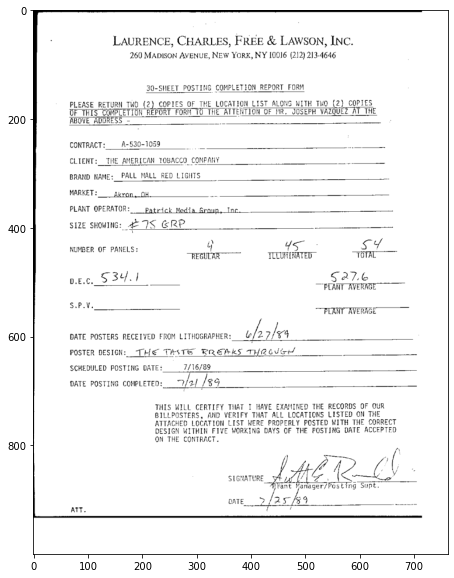

In [9]:
images = os.listdir(train_data_dir)
img_file_name = images[0]
img = plt.imread(os.path.join(train_data_dir,images[9]))

# Visualizing the first image 
plt.figure(figsize=(20,10))
print(f"Image Name: {images[9]}")
print(f"Image shape: {img.shape}")   # Shape of Height x Width
plt.imshow(img, cmap="gray")

In [12]:
# Extract the Annotations for the Above Image
img_annot_file = img_file_name.split('.')[0] + '.json'

with open(os.path.join('../data/funsd/training_data/annotations', img_annot_file), 'r') as file:
    print(file.read())


{
    "form": [
        {
            "box": [
                105,
                134,
                158,
                149
            ],
            "text": "Location",
            "label": "question",
            "words": [
                {
                    "box": [
                        105,
                        134,
                        158,
                        149
                    ],
                    "text": "Location"
                }
            ],
            "linking": [
                [
                    0,
                    39
                ]
            ],
            "id": 0
        },
        {
            "box": [
                425,
                130,
                475,
                145
            ],
            "text": "Division",
            "label": "question",
            "words": [
                {
                    "box": [
                        425,
                        130,
                        475,
      

In [11]:
# Define color code
colors = {
    'question': (0, 0, 255),
    'answer': (0, 255, 0),
    'header': (255, 0, 0),
    'other': (255, 255, 0)
}

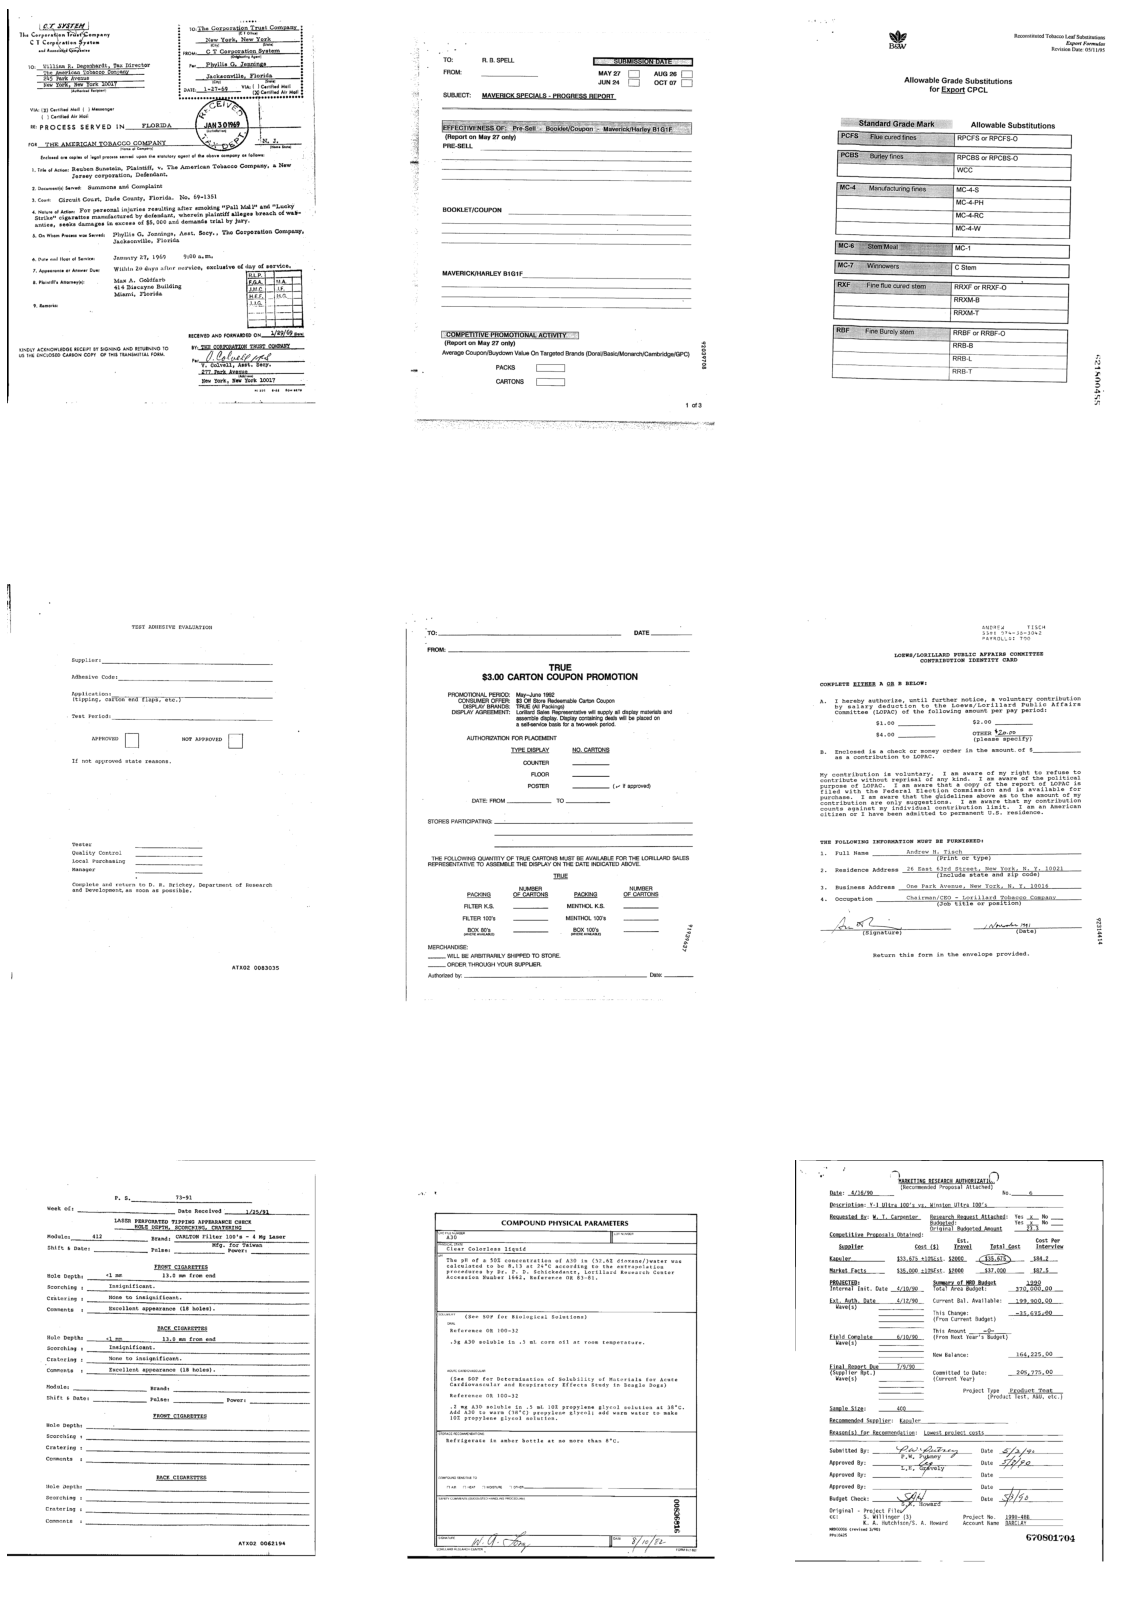

In [13]:
# Plot more images
fig = plt.figure(figsize=(20, 30))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    random_img = np.random.choice(images)
    img = plt.imread(os.path.join(train_data_dir,random_img))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap="gray")
    plt.axis(False)

## Visualizing Testing Data

Image Name: 82837252.png
Image shape: (1000, 754)


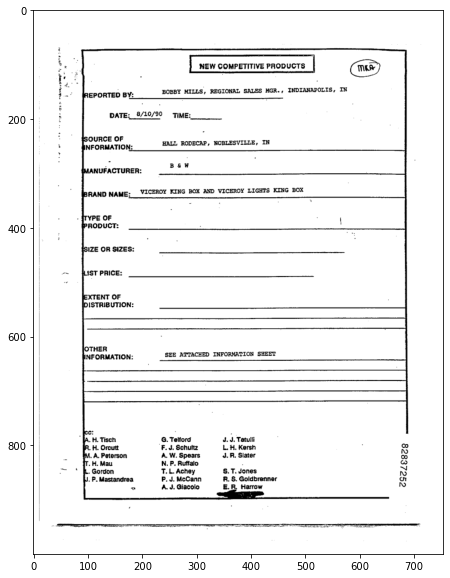

In [8]:
images = os.listdir(test_data_dir)
img = plt.imread(os.path.join(test_data_dir,images[0]))

# Visualizing the first image 
plt.figure(figsize=(20,10))
print(f"Image Name: {images[0]}")
print(f"Image shape: {img.shape}")   # Shape of Height x Width
plt.imshow(img, cmap="gray")

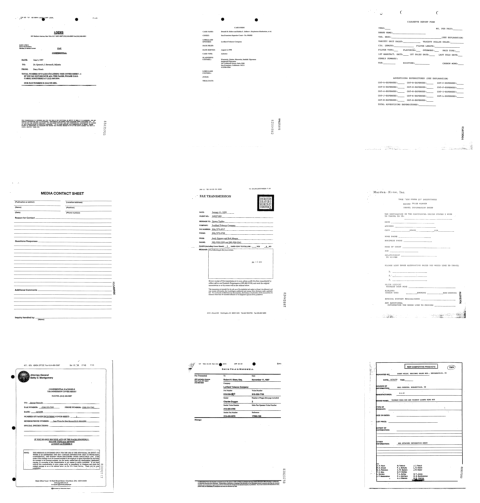

In [9]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    random_img = np.random.choice(images)
    img = plt.imread(os.path.join(test_data_dir,random_img))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap="gray")
    plt.axis(False)